In [3]:
# Imports
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [4]:
## This is just his code from L04: End Product Inhibition
## Will have to add to update with parts of the pathway we decide 

def EPI_dynamics(t,y,V_max_f_ABCDE,V_max_r_ABCDE,K_M_S_ABCDE,K_M_P_ABCDE,K_I_ABCDE):
    # y[0] = Thr L-threonine
    # y[1] = M1
    # y[2] = M2
    # y[3] = M3
    # y[4] = M4
    # y[5] = Ile Isoleucine
    dydt = np.zeros(6)

    I = y[5] #Isoleucine as inhibitor
    
    # enzyme rate laws
    V = np.zeros(len(y)-1)
    for i in range(len(y)-1):
        S = y[i]
        P = y[i+1]
        V[i] = ((V_max_f_ABCDE[i]/K_M_S_ABCDE[i])*S-(V_max_r_ABCDE[i]/K_M_P_ABCDE[i])*P)/(1+S/K_M_S_ABCDE[i]+P/K_M_P_ABCDE[i]+I/K_I_ABCDE[i])
        
    #dydt[0] = -V[0] #dynamic substrate
    dydt[0] = 0 #fixed substrate
    dydt[1] = V[0]-V[1]
    dydt[2] = V[1]-V[2]
    dydt[3] = V[2]-V[3]
    dydt[4] = V[3]-V[4]
    dydt[5] = V[4]

    return dydt

In [5]:
# Initial Conditions
y0 = [10,0,0,0,0,0]
# time span
t = np.linspace(0,10,1000)
tspan = [t[0],t[-1]]
V_max_f_ABCDE = [10,10,10,10,10]
V_max_r_ABCDE = [5,5,5,5,5]
K_M_S_ABCDE = [1,1,1,1,1]
K_M_P_ABCDE = [1,1,1,1,1]
K_I_ABCDE = [100,100,100,100,100]
ode_sol = solve_ivp(lambda t,y:EPI_dynamics(t,y,V_max_f_ABCDE,V_max_r_ABCDE,K_M_S_ABCDE,K_M_P_ABCDE,K_I_ABCDE),tspan,y0,t_eval=t)

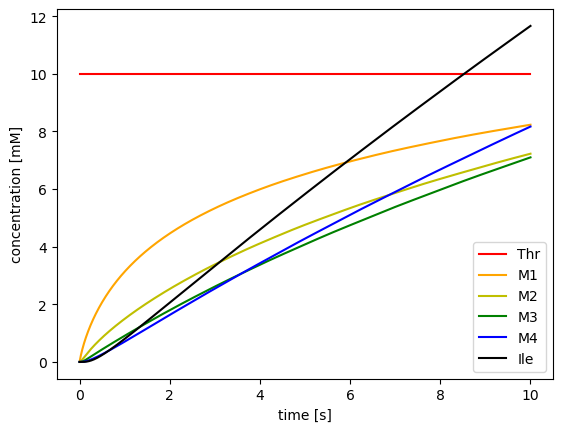

In [6]:
## Plotting the graphs
plt.plot(t,ode_sol.y[0],'r')
plt.plot(t,ode_sol.y[1],'orange')
plt.plot(t,ode_sol.y[2],'y')
plt.plot(t,ode_sol.y[3],'g')
plt.plot(t,ode_sol.y[4],'b')
plt.plot(t,ode_sol.y[5],'k')

plt.xlabel('time [s]')
plt.ylabel('concentration [mM]')
plt.legend(['Thr','M1','M2','M3','M4','Ile']);